<a href="https://colab.research.google.com/github/Hibath-K/HibathullaTheAnalyst.github.io/blob/main/dental21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**

In [2]:
import pandas as pd
from fbprophet import Prophet
import numpy as np


**Load data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving dental21.csv to dental21.csv


In [4]:
import io

In [5]:
df = pd.read_csv(io.BytesIO(uploaded['dental21.csv']))

In [6]:
df.head()

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,30-12-21,clinic_2,70172,1030,30,98.13
1,29-12-21,clinic_1,53371,756,15,65.13
2,29-12-21,clinic_2,69545,1030,30,105.18
3,27-12-21,clinic_1,43859,756,30,58.11
4,23-12-21,clinic_1,69303,756,30,119.00


**Apply Data Preprocessing**

In [7]:
df.dtypes

appointment_date              object
clinic_name                   object
patient_id                     int64
practitioner_id                int64
appointment_duration_min       int64
revenues_from_appointment    float64
dtype: object

In [8]:
df['appointment_date'] = pd.to_datetime(df['appointment_date'])

In [9]:
df.dtypes

appointment_date             datetime64[ns]
clinic_name                          object
patient_id                            int64
practitioner_id                       int64
appointment_duration_min              int64
revenues_from_appointment           float64
dtype: object

In [10]:
df

,appointment_date,clinic_name,patient_id,practitioner_id,appointment_duration_min,revenues_from_appointment
0,2021-12-30,clinic_2,70172,1030,30,98.13
1,2021-12-29,clinic_1,53371,756,15,65.13
2,2021-12-29,clinic_2,69545,1030,30,105.18
3,2021-12-27,clinic_1,43859,756,30,58.11
4,2021-12-23,clinic_1,69303,756,30,119.00
...,...,...,...,...,...,...
4066,2021-08-19,clinic_1,44907,755,30,83.87
4067,2021-02-09,clinic_1,45056,757,30,79.91
4068,2021-08-19,clinic_1,44919,757,30,90.10
4069,2021-07-22,clinic_1,45055,755,30,90.90


In [11]:
df1 = df.copy()

In [12]:
df1.drop('clinic_name',	axis = 1, inplace = True)

In [13]:
df1.drop('patient_id',	axis = 1, inplace = True)

In [14]:
df1.drop('practitioner_id',	axis = 1, inplace = True)

In [15]:
df1.drop('appointment_duration_min',	axis = 1, inplace = True)

In [16]:
df1

,appointment_date,revenues_from_appointment
0,2021-12-30,98.13
1,2021-12-29,65.13
2,2021-12-29,105.18
3,2021-12-27,58.11
4,2021-12-23,119.00
...,...,...
4066,2021-08-19,83.87
4067,2021-02-09,79.91
4068,2021-08-19,90.10
4069,2021-07-22,90.90


In [17]:
df1 = df1.sort_values(by=['appointment_date'])

In [18]:
df1 

,appointment_date,revenues_from_appointment
924,2021-01-07,100.26
1992,2021-01-07,101.03
1438,2021-01-07,101.03
4053,2021-01-07,101.03
1440,2021-01-07,40.31
...,...,...
1020,2021-12-30,105.68
1100,2021-12-30,470.38
1452,2021-12-30,41.71
967,2021-12-30,79.19


In [19]:
df1 = df1.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)


In [20]:
df1 = df1.drop_duplicates()

In [21]:
df1

,appointment_date,revenues_from_appointment
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51
...,...,...
3428,2021-12-30,104.95
482,2021-12-30,1412.03
1020,2021-12-30,105.68
1100,2021-12-30,470.38


In [22]:
df1.columns = ['ds', 'y']

In [23]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51


**Create Time Series Model**

In [24]:
m = Prophet(interval_width=0.95)

In [25]:
training_run = m.fit(df1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=400, freq= 'D')

In [27]:
future.head()

,ds
0,2021-01-07
1,2021-01-09
2,2021-01-10
3,2021-01-12
4,2021-02-07


**Forecast Data/ Evaluate Model**

In [28]:
forecast = m.predict(df1)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-01-07,159.399888,-327.557688,639.884110,159.399888,159.399888,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,143.914433
1,2021-01-07,159.399888,-391.982856,636.052639,159.399888,159.399888,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,143.914433
2,2021-01-07,159.399888,-316.306850,634.352434,159.399888,159.399888,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,143.914433
3,2021-01-09,159.345710,-355.142487,671.786357,159.345710,159.345710,12.936066,12.936066,12.936066,12.936066,12.936066,12.936066,0.0,0.0,0.0,172.281775
4,2021-01-09,159.345710,-337.030388,654.266308,159.345710,159.345710,12.936066,12.936066,12.936066,12.936066,12.936066,12.936066,0.0,0.0,0.0,172.281775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3251,2021-12-30,207.553725,-311.290274,705.525024,207.553725,207.553725,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,192.068270
3252,2021-12-30,207.553725,-365.503014,680.023924,207.553725,207.553725,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,192.068270
3253,2021-12-30,207.553725,-309.581059,681.824741,207.553725,207.553725,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,192.068270
3254,2021-12-30,207.553725,-343.759221,718.417066,207.553725,207.553725,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,-15.485455,0.0,0.0,0.0,192.068270


In [30]:
df1.head()

,ds,y
924,2021-01-07,100.26
1992,2021-01-07,101.03
1440,2021-01-07,40.31
1383,2021-01-09,152.97
3948,2021-01-09,98.51


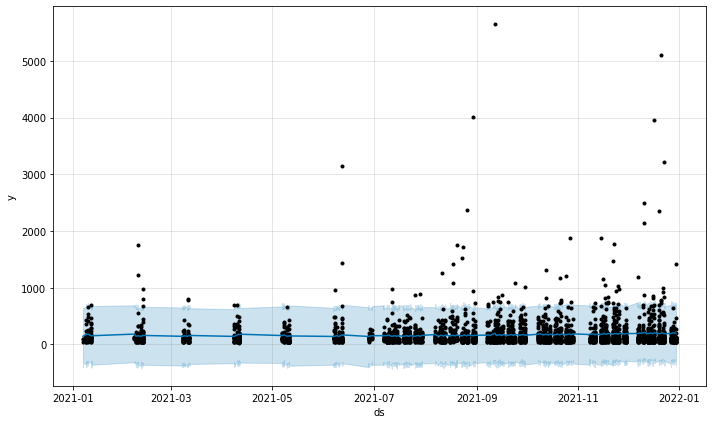

In [31]:
plot = m.plot(forecast)

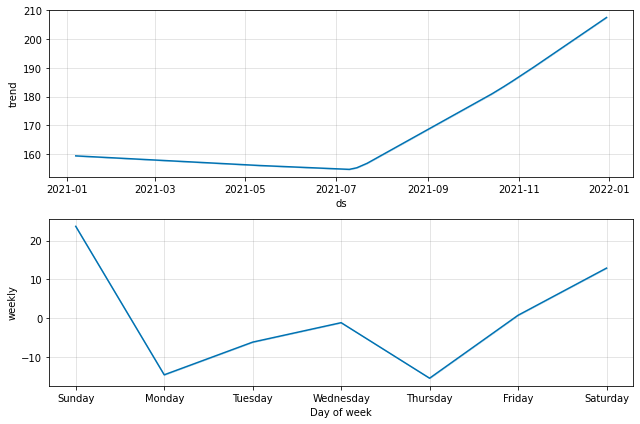

In [32]:
plot2 = m.plot_components(forecast)